# Housing: Price Prediction

## Data Description

To build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not.

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
dtest=pd.read_csv("test.csv")

In [3]:
dtrain=pd.read_csv("train.csv")

In [4]:
dtest=pd.DataFrame(dtest)

In [5]:
dtest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [6]:
dtrain=pd.DataFrame(dtrain)

In [7]:
dtrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [8]:
dtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
# To display the maximum number of rows

In [9]:
pd.set_option('display.max_rows',None)

## Exploratory Data Analysis

In [10]:
dtrain.shape

(1168, 81)

In [12]:
dtest.shape

(292, 80)

In [13]:
dtrain.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


There are integer,object as well as float data

In [14]:
dtest.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


The test data also has integer, object and float values

In [15]:
dtrain.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

There are many null values in few columns

In [16]:
dtest.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In test dataset also there are many null values

<AxesSubplot:>

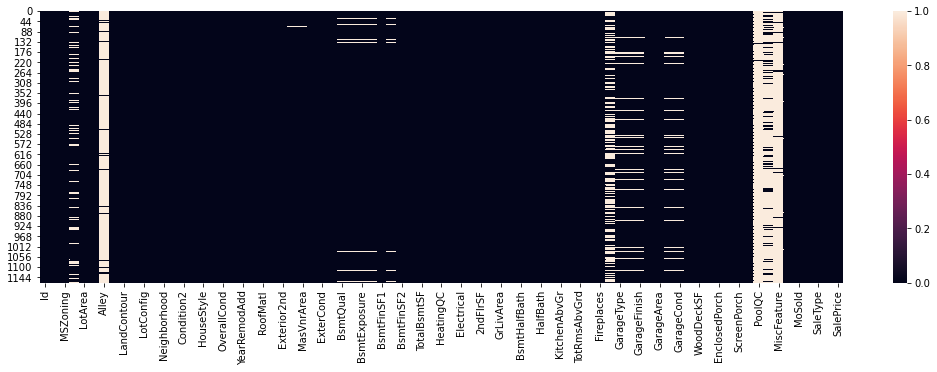

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (18,5))
sns.heatmap(dtrain.isnull()) #Looking for null values if any, in heatmap

In [18]:
#Dropping ID column because that does not affect our predictions
train_df=dtrain.drop(['Id'],axis=1)
test_df=dtest.drop(['Id'],axis=1)

In [19]:
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

In [20]:
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)

In [21]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype == "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mode()[0], inplace=True)

In [22]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=train_df.columns.values
for i in range(0,len(collist)):
    if train_df[collist[i]].dtype != "object":
        train_df[collist[i]].fillna(train_df[collist[i]].mean(), inplace=True)

In [23]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype == "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mode()[0], inplace=True)

In [24]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=test_df.columns.values
for i in range(0,len(collist)):
    if test_df[collist[i]].dtype != "object":
        test_df[collist[i]].fillna(test_df[collist[i]].mean(), inplace=True)

<AxesSubplot:>

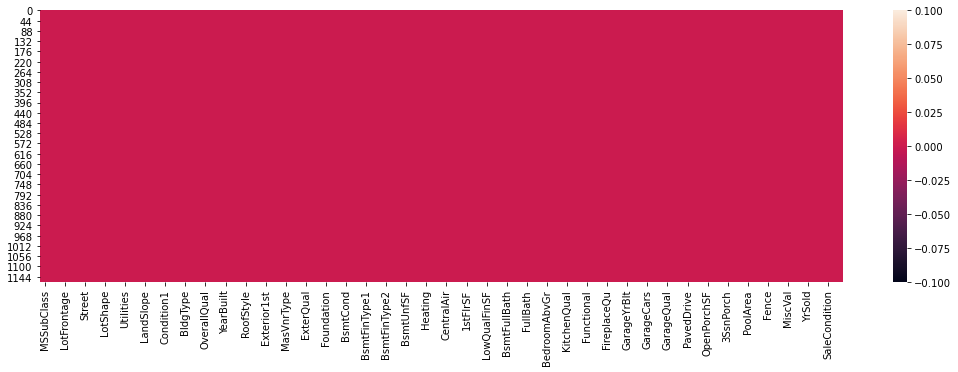

In [26]:
plt.figure(figsize = (18,5))
sns.heatmap(train_df.isnull()) #Looking for null values if any, in heatmap

In [27]:
train_df.drop('PoolQC',axis=1,inplace=True)

In [28]:
test_df.drop('PoolQC',axis=1,inplace=True)

In [29]:
# Converting years to age in train data
train_df['Year_SinceBuilt'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
train_df['Year_SinceRemodAdded'] = train_df['YearRemodAdd'].max() - train_df['YearRemodAdd']
train_df['Yr_SinceSold'] = train_df['YrSold'].max() - train_df['YrSold']
train_df['GarageBlt_since'] = train_df['GarageYrBlt'].max() - train_df['GarageYrBlt']

# Dropping columns the existing columns
train_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [30]:
# Converting years to age in test data
test_df['Year_SinceBuilt'] = test_df['YearBuilt'].max() - test_df['YearBuilt']
test_df['Year_SinceRemodAdded'] = test_df['YearRemodAdd'].max() - test_df['YearRemodAdd']
test_df['Yr_SinceSold'] = test_df['YrSold'].max() - test_df['YrSold']
test_df['GarageBlt_since'] = test_df['GarageYrBlt'].max() - test_df['GarageYrBlt']

# Dropping columns
test_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [31]:
#As the data types have been modified,updating the list
#creating list for object and non object columns for test data sets
test_objcols=[]
test_numcols=[]
for col in test_df.columns:
    if (test_df[col].dtype=='object'):
          test_objcols.append(col)
    else:
        test_numcols.append(col)
#creating list for object and non object columns for train data sets
train_objcols=[]
train_numcols=[]
for col in train_df.columns:
    if (train_df[col].dtype=='object'):
          train_objcols.append(col)
    else:
        train_numcols.append(col)

In [32]:
train_df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
count,1168.000000,1168,1168.000000,1168.000000,1168,1168,1168,1168,1168,1168,...,1168,1168.000000,1168.000000,1168,1168,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,...,4,NaN,NaN,9,6,NaN,NaN,NaN,NaN,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,Shed,NaN,NaN,WD,Normal,NaN,NaN,NaN,NaN,NaN
freq,NaN,928,NaN,NaN,1164,1132,740,1046,1168,842,...,1164,NaN,NaN,999,945,NaN,NaN,NaN,NaN,NaN
mean,56.767979,NaN,70.988470,10484.749144,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.315068,6.344178,NaN,NaN,181477.005993,39.069349,25.241438,2.195205,31.806159
std,41.940650,NaN,22.437056,8957.442311,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,543.264432,2.686352,NaN,NaN,79105.586863,30.145255,20.785185,1.329738,24.198559
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,1.000000,NaN,NaN,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,60.000000,7621.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,5.000000,NaN,NaN,130375.000000,10.000000,6.000000,1.000000,9.000000
50%,50.000000,NaN,70.988470,9522.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,6.000000,NaN,NaN,163995.000000,38.000000,17.000000,2.000000,31.806159
75%,70.000000,NaN,79.250000,11515.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,8.000000,NaN,NaN,215000.000000,56.000000,44.000000,3.000000,48.000000


There is a huge difference between standard deviation and mean in PoolArea,MiscVal so there are outliers and skewness

There is a huge difference between 75th percentile and maximum value in LotFrontage,LotArea,MiscVal.

There is huge difference of range in few columns such as MSSubClass,LotArea etc. so Scaling is required.

In [33]:
dfcor=train_df.corr()

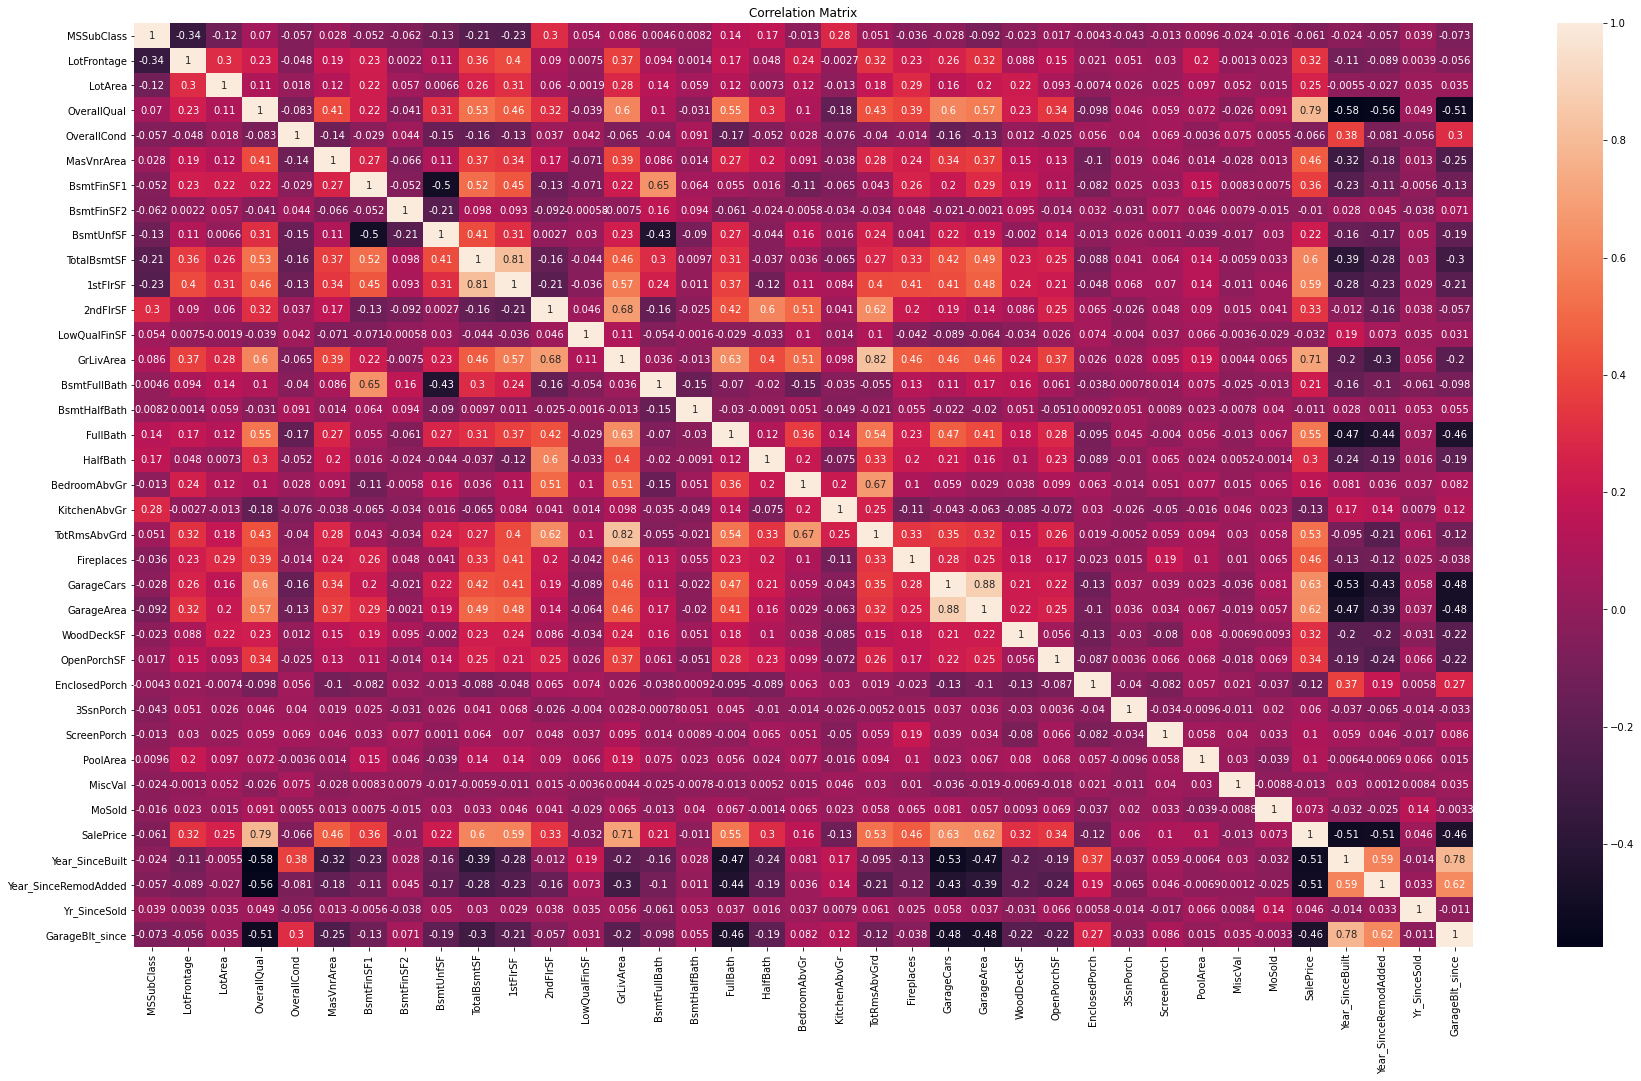

In [34]:
plt.figure(figsize=[30,17])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

The darker shade represents the negative correlation and lighter shades represents positive correlation.
Since there are many columns we cannot determine the relationship between each columns so we will plot it separately.

In [35]:
corr_matrix=dfcor.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.976440
GarageCars              0.929151
GarageArea              0.926116
GrLivArea               0.885602
FullBath                0.869652
TotalBsmtSF             0.847489
MasVnrArea              0.841463
1stFlrSF                0.824336
Fireplaces              0.775526
TotRmsAbvGrd            0.728779
OpenPorchSF             0.721001
WoodDeckSF              0.650344
LotFrontage             0.639406
BsmtFinSF1              0.545243
HalfBath                0.536313
BsmtUnfSF               0.483579
LotArea                 0.446299
2ndFlrSF                0.402784
BsmtFullBath            0.334207
BedroomAbvGr            0.222169
PoolArea                0.148661
MoSold                  0.083241
3SsnPorch               0.068577
ScreenPorch             0.026771
Yr_SinceSold           -0.010413
MSSubClass             -0.140291
BsmtFinSF2             -0.165344
MiscVal                -0.179395
BsmtHalfBath           -0.183421
LowQualFin

This shows the relation between target variable and all the column.

OverallQual has the highest relation with SalePrice  and BsmtQual has the lowest relation with SalePrice. 


In [37]:
train_df['BsmtQual'].unique() 

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [38]:
train_df['BsmtQual'].unique() 

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

This column has same values for both the data set

In [39]:
import matplotlib.pyplot as plt

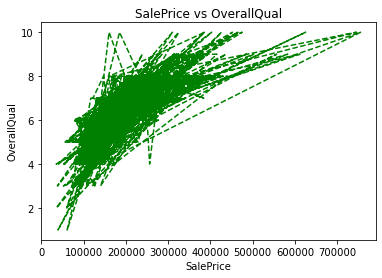

In [40]:
plt.title('SalePrice vs OverallQual')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.plot(train_df['SalePrice'],train_df['OverallQual'],'--g')
plt.show()

OverallQual rates the overall material and finishing of the house.

For 100000 the rates for finishing is only between 0 to 6 but for 200000 to 700000 OverallQual varies from 4 to 10

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

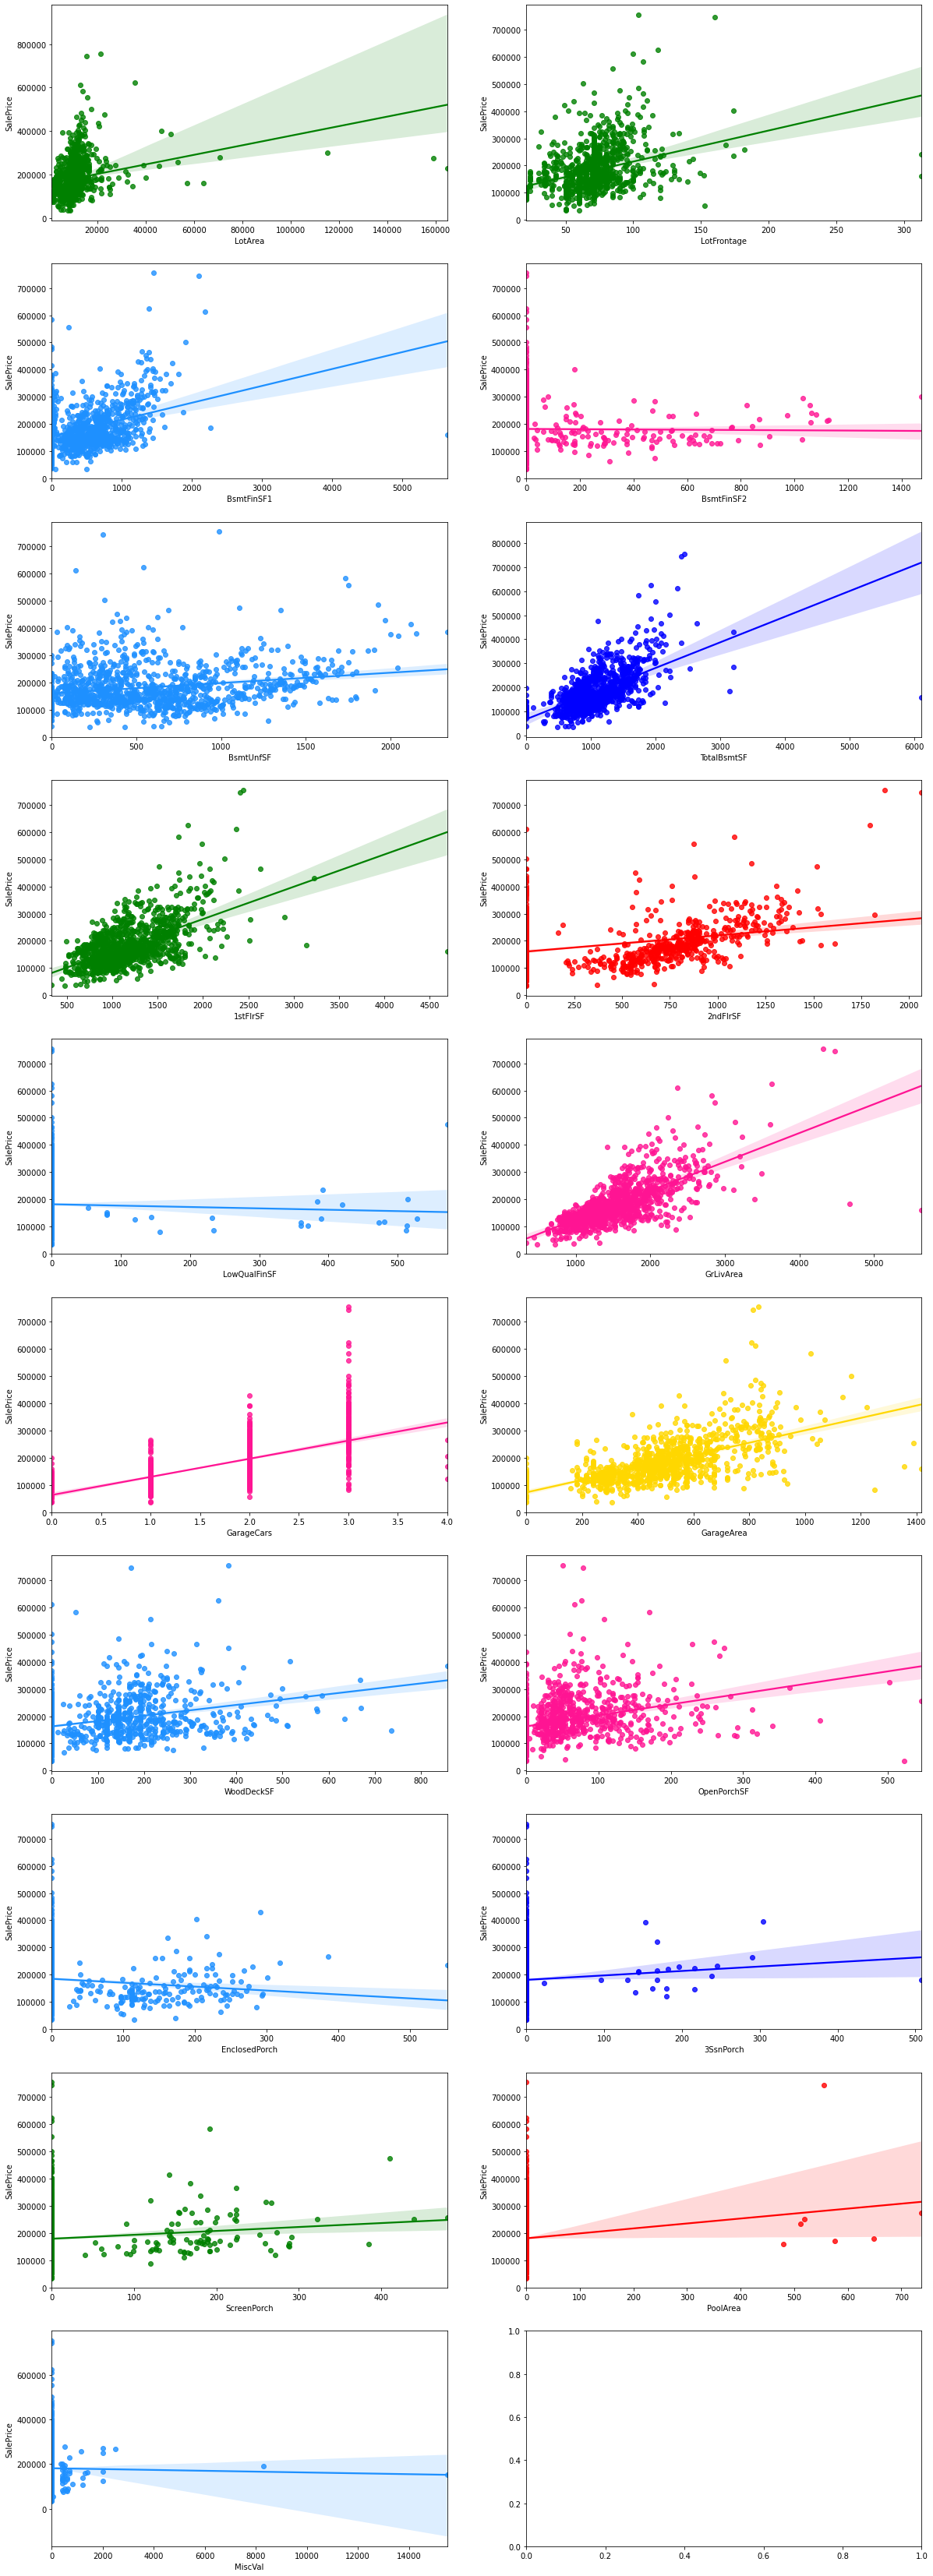

In [41]:
fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6),(ax7, ax8),( ax9,ax10),(ax11,ax12), (ax13, ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20)) = plt.subplots(nrows=10, ncols=2, figsize = (20,60))



sns.regplot(x=train_df['LotArea'] , y=train_df['SalePrice'],color="g",ax=ax1)
sns.regplot(x=train_df['LotFrontage'] , y=train_df['SalePrice'],color="g",ax=ax2)

sns.regplot(x=train_df['BsmtFinSF1'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax3)
sns.regplot(x=train_df['BsmtFinSF2'] ,y=train_df['SalePrice'], color="deeppink",ax=ax4)
sns.regplot(x=train_df['BsmtUnfSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax5)
sns.regplot(x=train_df['TotalBsmtSF'] , y=train_df['SalePrice'],color="b",ax=ax6)
sns.regplot(x=train_df['1stFlrSF'] , y=train_df['SalePrice'],color="g",ax=ax7)
sns.regplot(x=train_df['2ndFlrSF'] , y=train_df['SalePrice'],color="r",ax=ax8)
sns.regplot(x=train_df['LowQualFinSF'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax9)
sns.regplot(x=train_df['GrLivArea'] , y=train_df['SalePrice'],color="deeppink",ax=ax10)
sns.regplot(x=train_df['GarageCars'] ,y=train_df['SalePrice'], color="deeppink",ax=ax11)
sns.regplot(x=train_df['GarageArea'] , y=train_df['SalePrice'],color="gold",ax=ax12)
sns.regplot(x=train_df['WoodDeckSF'] ,y=train_df['SalePrice'], color="dodgerblue",ax=ax13)
sns.regplot(x=train_df['OpenPorchSF'] , y=train_df['SalePrice'],color="deeppink",ax=ax14)
sns.regplot(x=train_df['EnclosedPorch'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax15)
sns.regplot(x=train_df['3SsnPorch'] , y=train_df['SalePrice'],color="b",ax=ax16)
sns.regplot(x=train_df['ScreenPorch'] ,y=train_df['SalePrice'], color="g",ax=ax17)
sns.regplot(x=train_df['PoolArea'] , y=train_df['SalePrice'],color="r",ax=ax18)
sns.regplot(x=train_df['MiscVal'] , y=train_df['SalePrice'],color="dodgerblue",ax=ax19)

## Checking Outliers

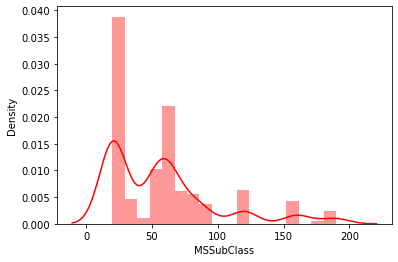

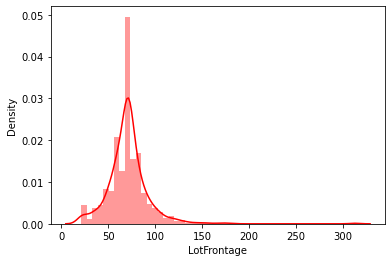

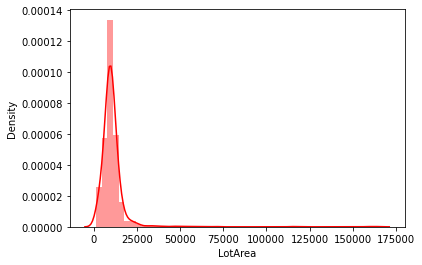

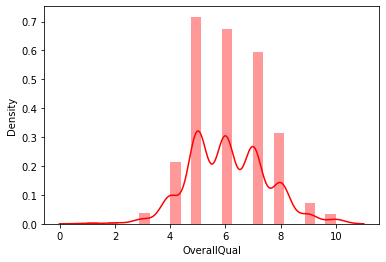

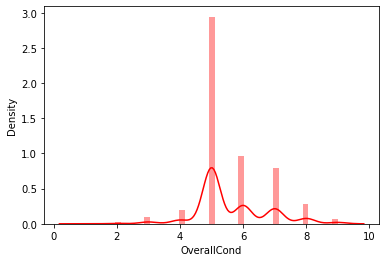

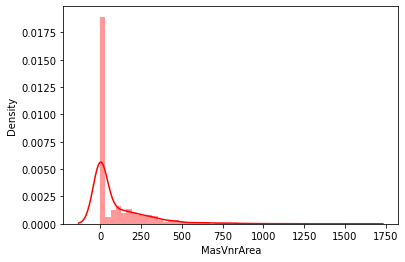

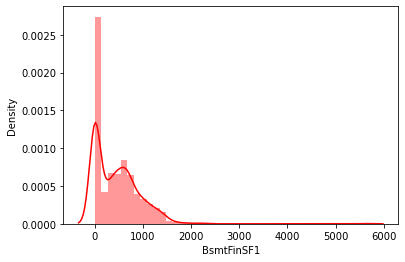

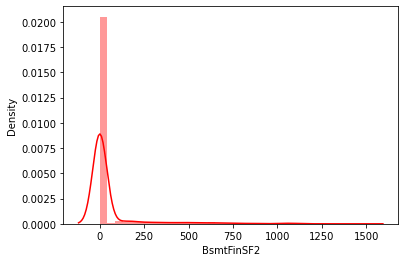

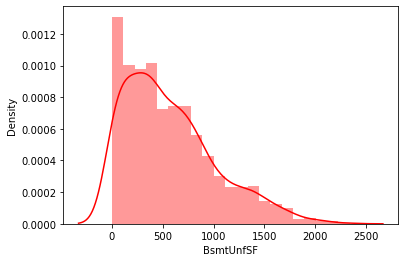

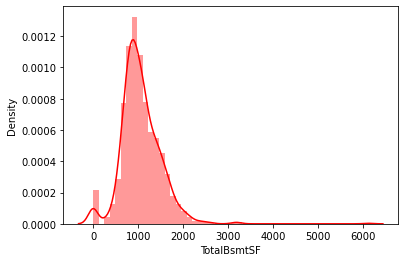

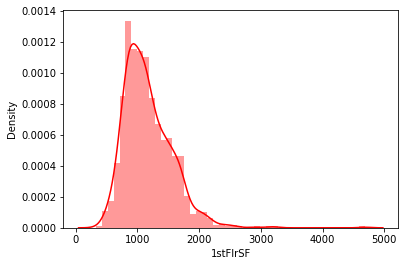

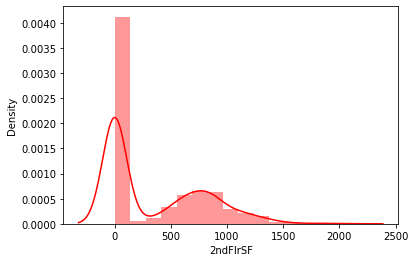

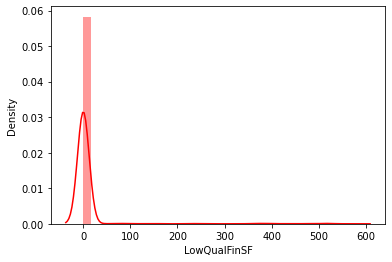

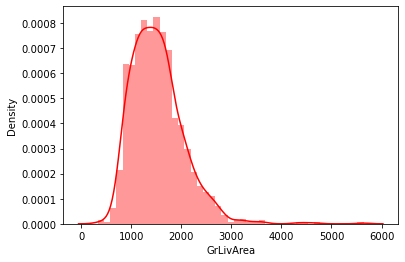

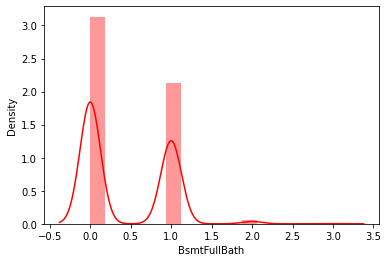

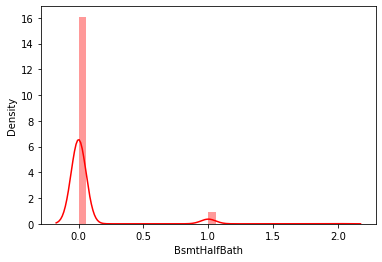

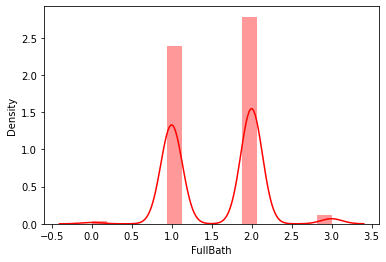

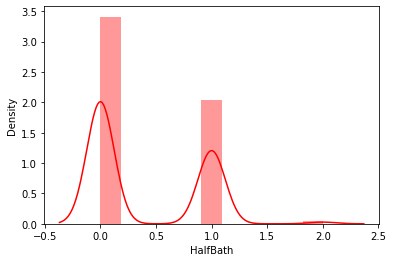

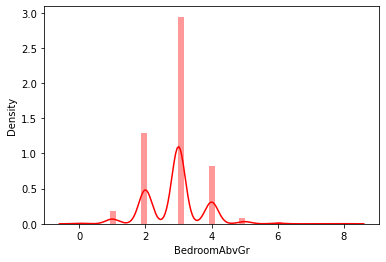

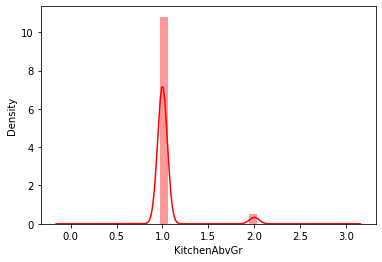

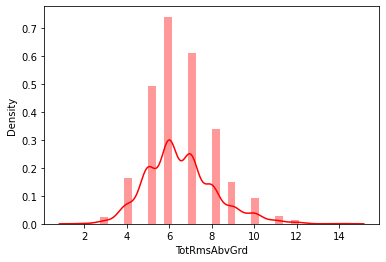

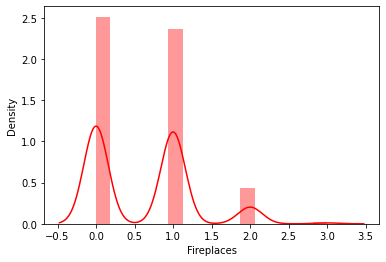

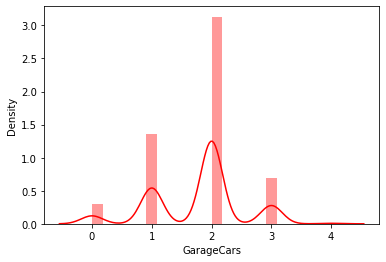

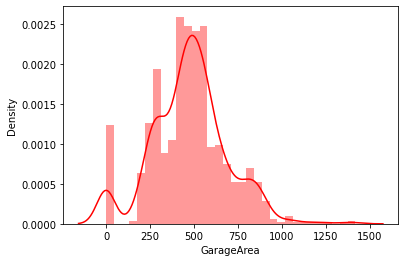

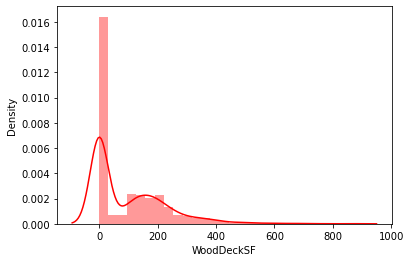

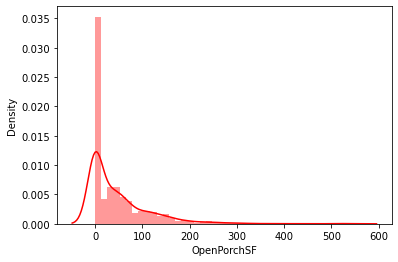

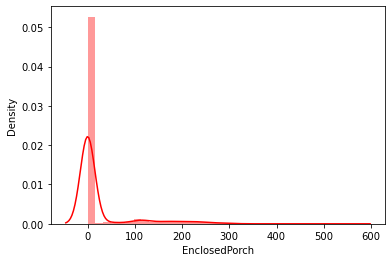

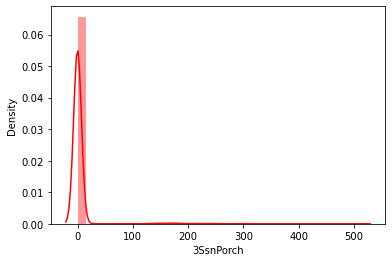

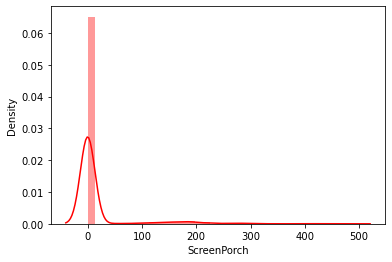

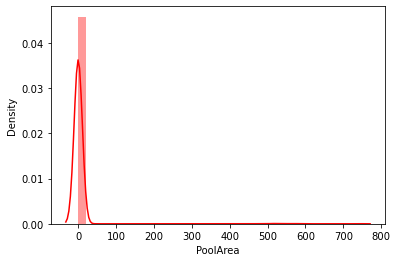

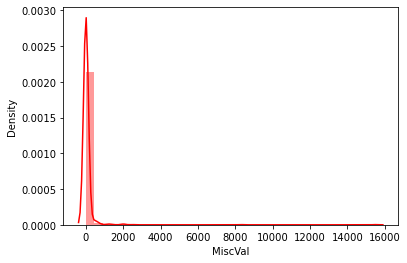

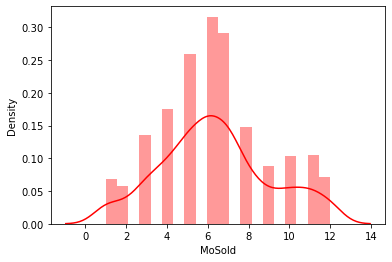

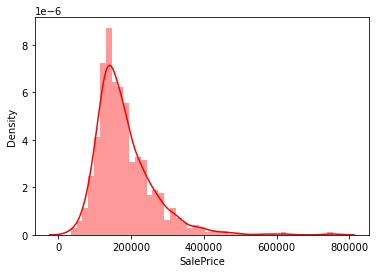

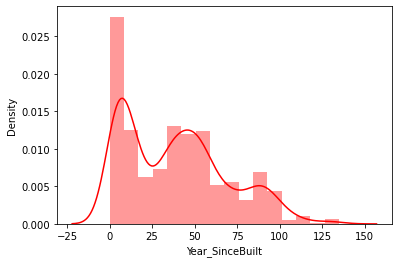

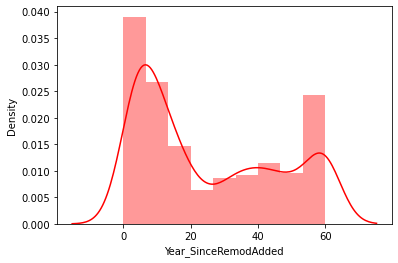

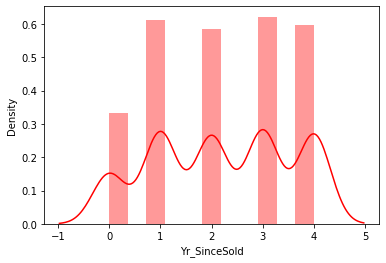

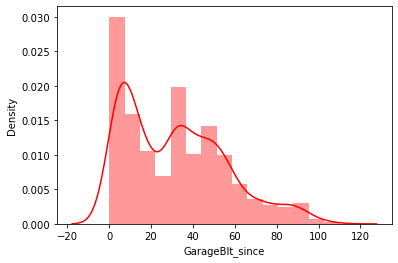

In [42]:
for i in train_df.describe().columns:
    sns.distplot(train_df[i],color='r')
    plt.show()

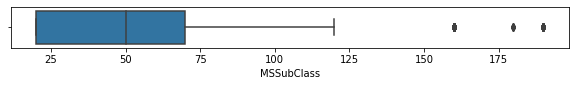

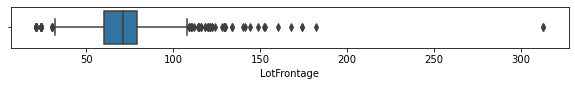

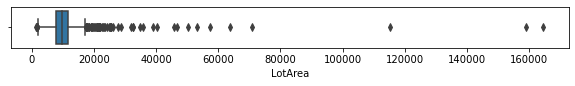

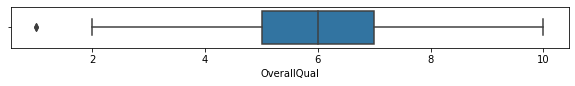

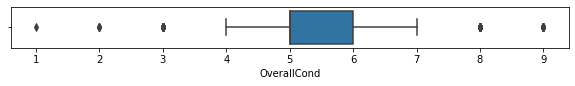

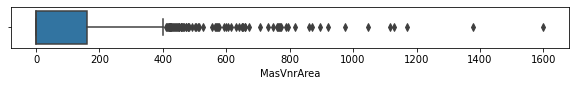

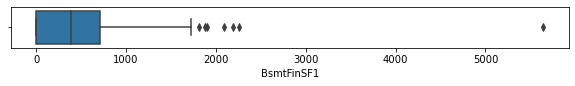

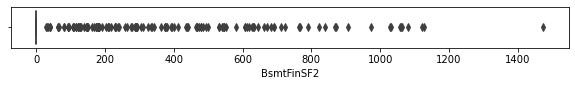

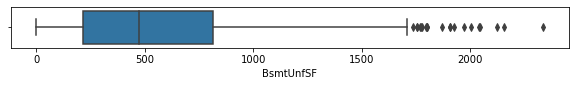

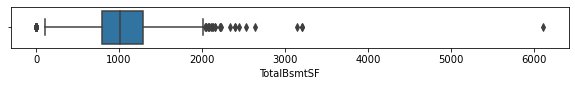

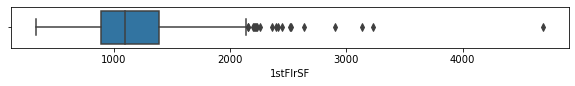

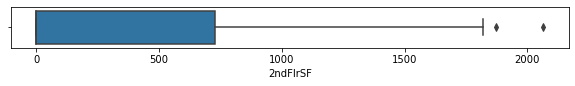

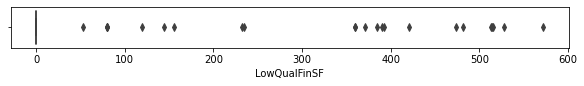

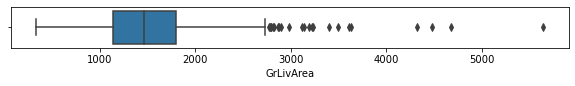

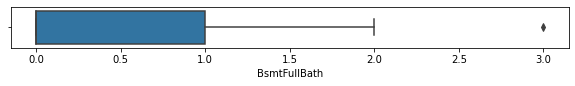

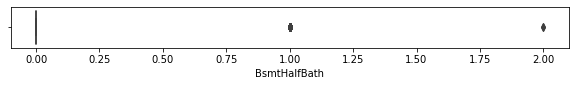

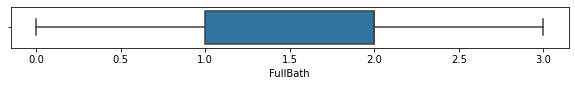

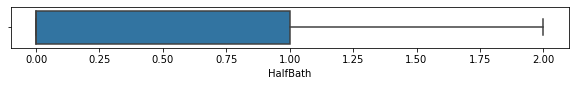

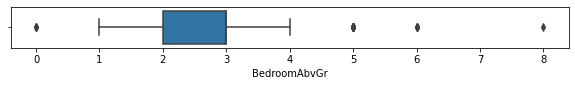

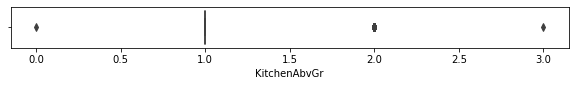

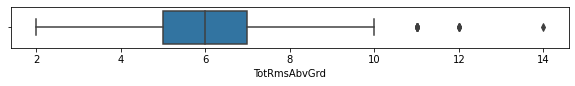

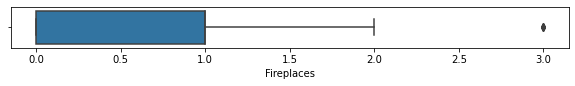

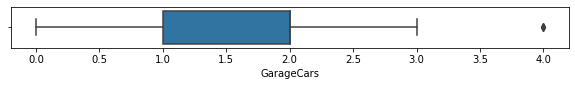

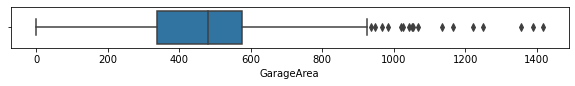

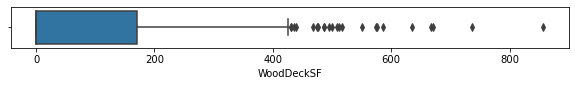

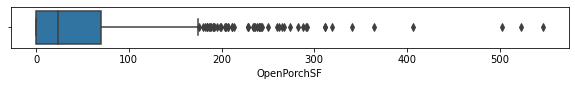

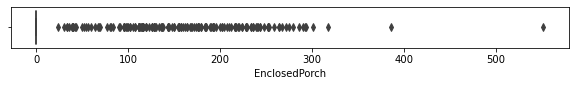

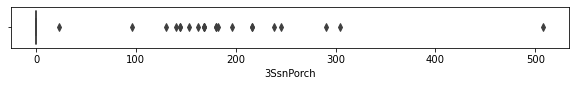

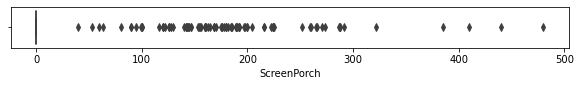

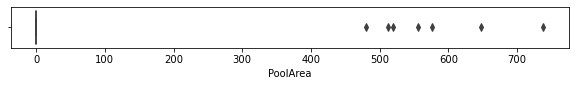

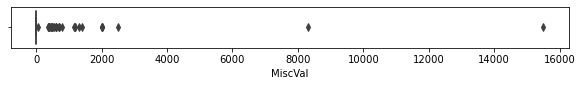

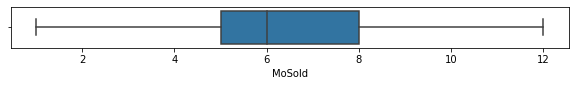

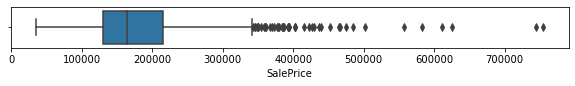

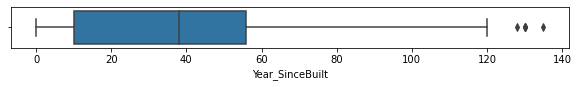

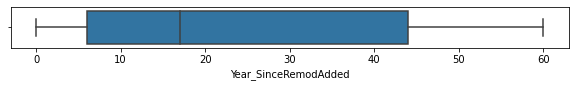

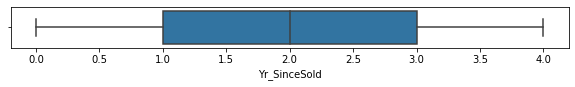

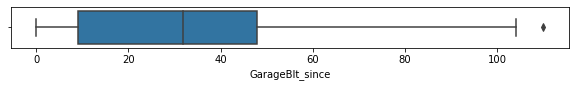

In [43]:
df=train_df.columns
for i in df :
    if train_df[i].dtypes!="object":
        plt.figure(figsize=(10,8))
        plt.subplot(912)
        sns.boxplot(train_df[i])

In [44]:
#Making function to remove the outliers with IQR hypertuning
df=train_df.copy()
Q1=df.quantile(0.010)
Q3=df.quantile(0.99)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new))/len(df))*100
print(df_new.shape,df.shape)
print("Data Loss % is",loss_)

(1154, 79) (1168, 79)
Data Loss % is 1.1986301369863013


In [45]:
#Making function to remove the outliers with IQR hypertuning
df_test=test_df.copy()
Q1=df_test.quantile(0.010)
Q3=df_test.quantile(0.99)
IQR=Q3-Q1
df_test_new=df_test[~((df_test<(Q1-1.5*IQR))|(df_test>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df_test)-len(df_test_new))/len(df_test))*100
print(df_test_new.shape,df_test.shape)
print("Data Loss % is",loss_)

(285, 78) (292, 78)
Data Loss % is 2.3972602739726026


In [46]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_new.columns
for i in d:
    if df_new[i].dtypes=='object':
        df_new[i]=l.fit_transform(df_new[i])

In [47]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_test_new.columns
for i in d:
    if df_test_new[i].dtypes=='object':
        df_test_new[i]=l.fit_transform(df_test_new[i])

## Checking Skewness

In [48]:
#lets split the data
df_x1=df_new.drop(columns='SalePrice',axis=1)
y=df_new[['SalePrice']]

In [49]:
df_x1.skew()

MSSubClass               1.420578
MSZoning                -1.786811
LotFrontage              1.900488
LotArea                  4.050185
Street                 -19.561794
Alley                    5.400329
LotShape                -0.614801
LandContour             -3.155333
Utilities                0.000000
LotConfig               -1.144658
LandSlope                4.864178
Neighborhood             0.038143
Condition1               3.034438
Condition2               8.771817
BldgType                 2.306830
HouseStyle               0.289318
OverallQual              0.157691
OverallCond              0.570810
RoofStyle                1.490057
RoofMatl                 7.746760
Exterior1st             -0.618959
Exterior2nd             -0.603815
MasVnrType              -0.091900
MasVnrArea               2.854969
ExterQual               -1.806087
ExterCond               -2.547772
Foundation              -0.041522
BsmtQual                -1.344926
BsmtCond                -3.289731
BsmtExposure  

There are skewness in many columns

## Removing Skewness

In [50]:
f=df_x1.columns
for i in f:
    if df_x1[i].dtypes!='object':
        if df_x1[i].skew()>0.55:
            df_x1[i]=np.sqrt(df_x1[i])

In [51]:
f=df_test_new.columns
for i in f:
    if df_test_new[i].dtypes!='object':
        if df_test_new[i].skew()>0.55:
            df_test_new[i]=np.sqrt(df_test_new[i])

## Scaling

In [52]:
#sacalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(df_x1)
df_x=pd.DataFrame(x1,columns=df_x1.columns)
df_x.shape

(1154, 78)

In [53]:
#sacalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_x1=sc.fit_transform(df_test_new)
df_test_x=pd.DataFrame(test_x1,columns=df_test_new.columns)
df_test_x.shape

(285, 78)

In [54]:
df_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,1.513271,-0.021777,0.093480,-1.185832,0.051053,-0.179445,-1.378732,0.315288,0.0,0.599660,...,0.252276,0.02945,-0.170685,-1.620631,0.331284,0.204613,0.062221,0.417404,0.609917,0.262850
1,-1.018541,-0.021777,1.170525,1.232227,0.051053,-0.179445,-1.378732,0.315288,0.0,0.599660,...,0.252276,0.02945,-0.170685,1.356223,0.331284,0.204613,0.249561,0.705377,0.609917,0.515240
2,0.260126,-0.021777,1.044074,0.089168,0.051053,-0.179445,-1.378732,0.315288,0.0,-1.235904,...,0.252276,0.02945,-0.170685,-0.132204,0.331284,0.204613,-0.730741,-0.590504,0.609917,-0.667964
3,-1.018541,-0.021777,1.578214,0.470930,0.051053,-0.179445,-1.378732,0.315288,0.0,0.599660,...,0.252276,0.02945,-0.170685,-1.992738,-4.585775,0.204613,0.029433,0.369408,-1.645994,0.262850
4,-1.018541,-0.021777,0.093480,1.363216,0.051053,-0.179445,-1.378732,0.315288,0.0,-0.624050,...,0.252276,0.02945,-0.170685,-0.132204,0.331284,0.204613,0.029433,-0.734491,-0.894024,0.262850


In [55]:
df_test_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Yr_SinceSold,GarageBlt_since
0,-0.990096,-0.279336,1.083739,0.906883,0.084066,-0.11931,-1.410929,-2.629007,-0.059339,-1.992603,...,0.210567,0.0,-0.169269,0.289417,0.233253,0.150510,-1.231416,-1.157855,0.635842,-1.224263
1,1.466433,-0.279336,0.042915,-0.807024,0.084066,-0.11931,-1.410929,0.292112,-0.059339,-1.343584,...,0.210567,0.0,-0.169269,0.651187,-6.414458,-3.281109,-0.119722,0.298559,-0.874283,0.042246
2,-0.990096,-0.279336,0.042915,0.498571,0.084066,-0.11931,0.739417,0.292112,-0.059339,0.603474,...,0.210567,0.0,-0.169269,-0.072354,0.233253,0.150510,-0.924430,-0.687895,-0.874283,-0.886316
3,0.485744,-0.279336,0.498854,0.528328,0.084066,-0.11931,0.739417,-4.089566,-0.059339,0.603474,...,0.210567,0.0,-0.169269,0.289417,0.233253,0.150510,1.083209,1.542517,-0.874283,1.461222
4,0.250550,-0.279336,1.083739,0.980639,0.084066,-0.11931,-1.410929,0.292112,-0.059339,-1.343584,...,0.210567,0.0,-0.169269,-1.881208,0.233253,0.150510,-1.448488,-1.283780,-0.119220,-1.447230


## PCA

In [56]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_x.columns))
cover_matrix.fit(df_x)

PCA(n_components=78)

In [57]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_test_x.columns))
cover_matrix.fit(df_test_x)

PCA(n_components=78)

In [58]:
pc=PCA(n_components=20)
x1=pc.fit_transform(df_x)
df_x=pd.DataFrame(x1)

In [59]:
pc=PCA(n_components=20)
test_x1=pc.fit_transform(df_test_x)
df_test_x=pd.DataFrame(test_x1)

In [60]:
df_x.shape

(1154, 20)

In [61]:
df_test_x.shape

(285, 20)

## Finding the best random state

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8813368375411876  on Random_state  120


## Creating Train Test Split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=.30,random_state=maxRS)

## Finding the best algorithm

In [67]:
from sklearn.model_selection import cross_val_score

In [69]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVR()]
for m in model:
    print('accuracy score of -', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,df_x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("------------------------------")

accuracy score of - LinearRegression()
R2 Score:                 0.8813368375411876
Mean Absolute Error:      19678.09646588265
Mean Squared error:       655024262.1502967
Root Mean Squared Error:  25593.441780079065
[0.87073263 0.85138198 0.75609286 0.83163727 0.8086462  0.83773629
 0.83401732 0.82656542]
cross validation score:   0.8271012467901726
Difference between R2 score and cross validatio score is -  0.05423559075101503
------------------------------
accuracy score of - RandomForestRegressor()
R2 Score:                 0.877942681153628
Mean Absolute Error:      17816.612708933717
Mean Squared error:       673760108.5352747
Root Mean Squared Error:  25956.889423335662
[0.85881683 0.89856657 0.76200893 0.84170427 0.82842176 0.8684008
 0.8471472  0.86205619]
cross validation score:   0.8458903179197086
Difference between R2 score and cross validatio score is -  0.032052363233919356
------------------------------
accuracy score of - DecisionTreeRegressor()
R2 Score:              

## Hyper paramter tuning

In [70]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {"n_estimators":[100,200,300,400,500,600,700,800],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6],
              "max_features":['auto','sqrt'],
              "min_samples_split":[2,5,8,10,12,18]}

In [71]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 8}

In [72]:
clf_pred = clf.best_estimator_.predict(x_test)

In [73]:
r2_score(y_test, clf_pred)

0.874497040890476

## Saving the best model

In [74]:
import joblib
joblib.dump(clf.best_estimator_,"Housing.obj")
RF_from_joblib=joblib.load('Housing.obj')
Predicted = RF_from_joblib.predict(x_test)

## Predicting for Test Data

In [76]:
Predicted = RF_from_joblib.predict(df_test_x)

In [77]:
Predicted

array([351770.52729933, 192254.5466495 , 248540.10215663, 135717.70740225,
       257541.0224359 , 101173.86304718, 202791.94790457, 318699.50236997,
       228943.8144688 , 226158.12165201,  96649.89412387, 135247.69493755,
       129742.28395299, 203488.79740155, 327257.84457293, 103300.33664906,
       132990.25404216, 113752.26792698, 238122.25066244, 209468.19086579,
       118513.94271204, 154767.59510942, 151497.50925013,  88721.2871242 ,
       149286.44123404, 182150.27868127, 151223.09746776, 162242.60013182,
        90152.47900472, 152306.27450613, 205243.77107219, 226739.05972609,
       164701.57672643,  94590.80861093, 178930.30296904, 203742.0942521 ,
       125391.53751054, 147928.98127317, 161478.98609535, 111126.09465227,
       282155.28051782, 199690.0013213 , 203419.56038701, 165924.80338769,
       101270.15852861, 112380.141465  ,  84787.21044491, 269415.6726177 ,
       346121.52970151, 135354.90125183, 203987.24863129, 106831.70875516,
        95424.47396637, 2